# Predicting flight delation
## Description
This project is made to analyse, understand and make model of Flight Delays Data from 2015. This data set is part of kaggle datasets: https://www.kaggle.com/usdot/flight-delays

### Steps
- Improting data ✅
- Understanding data ✅
- Feature engineering ✅
- Analysing data ✅
-  Plotting data in depend of:
    - airport
    - airline
    - plane type
- Modeling data ✅
- Finding best algorithm ✅

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import  metrics


# Data import

In [2]:
data = pd.read_csv('DATA/flights.csv')

C:\Users\damix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### 1) Warning informs that columns 7 and 8 have data types mixed. This is a very important point for the future.

In [3]:
print(data.shape)

(5819079, 31)


In [4]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


# Understanding variables

* *YEAR*, *MONTH*, *DAY*, *DAY_OF_WEEK* - dates of the flight
* AIRLINE  -An identification number assigned by US GOV to identify a unique airline
* FLIGHT_NUMBER -The common unique flight number of the flight.
* TAIL_NUMBER -  The unique aircraft number.
* **ORIGIN_AIRPORT**, **DESTINATION_AIRPORT** - code attributed by IATA to identify the airports
* SCHEDULED_DEPARTURE - scheduled time of departure
* SCHEDULED_ARRIVAL - scheduled time of arrival
* **DEPARTURE_TIME**, **ARRIVAL_TIME** - real times at which take-off and landing took place
* **DEPARTURE_DELAY**, **ARRIVAL_DELAY** - difference (in minutes) between planned and real times
* TAXI_OUT - elapsed time from gate to take-off
* WHEELS_OFF - time of take off
* SCHEDULED_TIME - scheduled time of departure
* ELAPSED_TIME - time elapsed from taxi out to taxi in
* AIR_TIME - air time of flight
* DISTANCE - distance of flight (in miles),
* WHEELS_ON -  time of landing
* TAXI_IN - time that elapsed from landing and docking in gate
* DIVERTED - 1 if flight have been diverted and landed on another airport that scheduled
* CANCELLED - 1 if flight have been canceleed
* CANCELLATION_REASON - reson of flight cancellation
* AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY - reasons of delay

***
# Feature engineering

## _na_ handling

In [6]:
data.isna().sum()*100/data.shape[0]

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

Above result shows that there are a lot (82%) of missing data in reason of flight delation. Also in cancellation reason there are almost 98%.

In [7]:
data[data['CANCELLED']>0]['ARRIVAL_DELAY'].dropna()

Series([], Name: ARRIVAL_DELAY, dtype: float64)

From the above result, I conclude that there are no delays in the data when the flight is canceled. For this reason, I remove the **CANCLLED** and **CANCELLATION_REASON** columns from the data because in this example I am dealing with delays.

In [8]:
data.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

Because of that, there is need to drop rows with Cancelled flights.

In [9]:
data.drop(data[(data['CANCELLED']>0)].index, inplace=True)

In [10]:
data.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               1
ELAPSED_TIME             15187
AIR_TIME                 15187
DISTANCE                     0
WHEELS_ON                 2629
TAXI_IN                   2629
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME              2629
ARRIVAL_DELAY            15187
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4665756
SECURITY_DELAY         4665756
AIRLINE_DELAY          4665756
LATE_AIRCRAFT_DELAY    4665756
WEATHER_DELAY          4665756
dtype: int64

In [11]:
data = data.drop(['CANCELLED','CANCELLATION_REASON'], axis=1)

**Diversion**

I conclude that if the flight was Diverted there won't be data 

In [12]:
data[data['DIVERTED']>0]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
724,2015,1,1,4,DL,716,N944DL,OMA,ATL,645,...,4.0,1009,1451.0,NaN,1,NaN,NaN,NaN,NaN,NaN
1455,2015,1,1,4,OO,5237,N712SK,MKE,IAH,745,...,9.0,1041,1505.0,NaN,1,NaN,NaN,NaN,NaN,NaN
2218,2015,1,1,4,WN,1966,N685SW,ATL,JAX,845,...,5.0,1000,1219.0,NaN,1,NaN,NaN,NaN,NaN,NaN
2526,2015,1,1,4,EV,4555,N12552,IAH,HRL,902,...,5.0,1017,1319.0,NaN,1,NaN,NaN,NaN,NaN,NaN
2866,2015,1,1,4,WN,1081,N214WN,MDW,OKC,930,...,3.0,1135,1343.0,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813860,2015,12,31,4,UA,1291,N596UA,LIH,LAX,1405,...,NaN,2141,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5815052,2015,12,31,4,EV,2785,N684JW,DFW,BRO,1530,...,NaN,1720,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5816657,2015,12,31,4,UA,291,N76505,IAD,SMF,1735,...,4.0,2026,2216.0,NaN,1,NaN,NaN,NaN,NaN,NaN
5817342,2015,12,31,4,MQ,3060,N648MQ,DFW,FAR,1830,...,3.0,2113,2250.0,NaN,1,NaN,NaN,NaN,NaN,NaN


In [13]:
data_without_nulls = data.drop(data[(data['DIVERTED']>0)].index)

In [14]:
data_without_nulls = data_without_nulls.drop(['DIVERTED'], axis=1)

In [15]:
data_without_nulls.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

Variables: 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' are indicators of delay reson. 
Knowing those variables would be too obvious for algorithm to define it with occurrence of a delay. Those columns should be dropped.

In [16]:
Flights_Delays_Combined =  data_without_nulls.drop(['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [17]:
Flights_Delays_Combined.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [18]:
Flights_Delays_Combined.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY'],
      dtype='object')

In [19]:
Flights_Delays_Combined.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
dtype: int64

There are no missing data left in dataset.

***

## Handling mixed value types

In refrence to point **1)** I am handling mixed data types by making writing function that changes numer airport code to unknown ('unk')

In [20]:
Flights_Delays_Combined['ORIGIN_AIRPORT'].value_counts()

ATL      343506
ORD      276554
DFW      232647
DEN      193402
LAX      192003
          ...  
15497         1
11097         1
13459         1
12265         1
11503         1
Name: ORIGIN_AIRPORT, Length: 929, dtype: int64

In [21]:
Flights_Delays_Combined['DESTINATION_AIRPORT'].value_counts()

ATL      343076
ORD      275864
DFW      231764
DEN      193033
LAX      192136
          ...  
10666         1
11097         1
14222         1
14025         1
13459         1
Name: DESTINATION_AIRPORT, Length: 929, dtype: int64

In [22]:
def airport_trainsformation(value):
    '''
    >>> airport_trainsformation('ATL')
    'ATL'
    >>> airport_trainsformation(11097)
    'unk'
    >>> airport_trainsformation(15497)
    'unk'
    '''
    if len(str(value))>3:
        return 'unk'
    else:
        return value

import doctest
doctest.testmod()

TestResults(failed=0, attempted=3)

In [23]:
Flights_Delays_Combined['ORIGIN_AIRPORT_transformed'] = Flights_Delays_Combined['ORIGIN_AIRPORT'].apply(airport_trainsformation)
Flights_Delays_Combined['DESTINATION_AIRPORT_transformed'] = Flights_Delays_Combined['DESTINATION_AIRPORT'].apply(airport_trainsformation)

In [24]:
Flights_Delays_Combined['DESTINATION_AIRPORT_transformed'].value_counts()

unk    482878
ATL    343076
ORD    275864
DFW    231764
DEN    193033
        ...  
DLG        77
STC        77
GST        74
AKN        63
ITH        31
Name: DESTINATION_AIRPORT_transformed, Length: 323, dtype: int64

In [25]:
Flights_Delays_Combined = Flights_Delays_Combined.drop(Flights_Delays_Combined[(Flights_Delays_Combined['DESTINATION_AIRPORT_transformed']=='unk')].index)

In [26]:
Flights_Delays_Combined = Flights_Delays_Combined.drop(Flights_Delays_Combined[(Flights_Delays_Combined['ORIGIN_AIRPORT_transformed']=='unk')].index)

In [27]:
Flights_Delays_Combined['DESTINATION_AIRPORT_transformed'].value_counts()

ATL    343076
ORD    275864
DFW    231764
DEN    193033
LAX    192136
        ...  
STC        77
DLG        77
GST        74
AKN        63
ITH        31
Name: DESTINATION_AIRPORT_transformed, Length: 322, dtype: int64

In [28]:
Flights_Delays_Combined = Flights_Delays_Combined.drop(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'], axis=1)

### Not understable data format in time columns
In data dates are in float format. Those should be changed for datetime format. I defined *time_transformation* with doctesting function for that.

In [29]:
Flights_Delays_Combined['DEPARTURE_TIME']

0          2354.0
1             2.0
2            18.0
3            15.0
4            24.0
            ...  
5819074    2355.0
5819075    2355.0
5819076    2350.0
5819077    2353.0
5819078      14.0
Name: DEPARTURE_TIME, Length: 5231130, dtype: float64

In [30]:
max(Flights_Delays_Combined['DEPARTURE_TIME'])

2400.0

Hours are in numerical format. I convert them to datetime

In [31]:
def time_transformation(time):
  """
  >>> time_transformation(0)
  datetime.time(0, 0)
  >>> time_transformation(2400)
  datetime.time(0, 0)
  >>> time_transformation(2359)
  datetime.time(23, 59)
  >>> time_transformation(1200)
  datetime.time(12, 0)
  >>> time_transformation(0734.00)
  datetime.time(7, 34)
  >>> time_transformation(734.00)
  datetime.time(7, 34)
  >>> time_transformation(34.00)
  datetime.time(0, 34)
  >>> time_transformation(4.00)
  datetime.time(0, 4)
  """
  time_string = str(int(time))
  time_string = time_string.split('.')[0]
  time_string = time_string.zfill(4)
  hours = int(time_string[0:2])
  minutes = int(time_string[2:4])
  if hours == 24:
    hours = 0
  hours_minutes = datetime.time(hours,minutes)
  return hours_minutes
  
import doctest
doctest.testmod()

TestResults(failed=0, attempted=11)

In [32]:
Flights_Delays_Combined['DEP_TIME'] = Flights_Delays_Combined['DEPARTURE_TIME'].apply(time_transformation)
Flights_Delays_Combined['DEP_TIME']

0          23:54:00
1          00:02:00
2          00:18:00
3          00:15:00
4          00:24:00
             ...   
5819074    23:55:00
5819075    23:55:00
5819076    23:50:00
5819077    23:53:00
5819078    00:14:00
Name: DEP_TIME, Length: 5231130, dtype: object

In [33]:
Flights_Delays_Combined['SCH_ARR_TIME'] =Flights_Delays_Combined['SCHEDULED_ARRIVAL'].apply(time_transformation)
Flights_Delays_Combined['SCH_DEP_TIME'] =Flights_Delays_Combined['SCHEDULED_DEPARTURE'].apply(time_transformation)
Flights_Delays_Combined['ARR_TIME'] =Flights_Delays_Combined['ARRIVAL_TIME'].apply(time_transformation)
Flights_Delays_Combined['WHEELS_OFF'] =Flights_Delays_Combined['WHEELS_OFF'].apply(time_transformation)
Flights_Delays_Combined['WHEELS_ON'] =Flights_Delays_Combined['WHEELS_ON'].apply(time_transformation)

In [34]:
#Flights_Delays_Combined_small=Flights_Delays_Combined[Flights_Delays_Combined['MONTH']==1]

Combining columns with dates into a single Datetime column

In [35]:
Flights_Delays_Combined['DATE'] = pd.to_datetime(Flights_Delays_Combined[['YEAR','MONTH','DAY']])
Flights_Delays_Combined['DATE']

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: DATE, Length: 5231130, dtype: datetime64[ns]

In [36]:
Flights_Delays_Combined['DayOfWeek'] = Flights_Delays_Combined['DATE'].apply(date.weekday)
Flights_Delays_Combined = Flights_Delays_Combined.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK'], axis=1)

 Categorical variables such as AIRLINE, PLANE, DEP_ARP, ARR_ARP should also take into account

In [37]:
Flights_Delays_Combined.head()

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,ORIGIN_AIRPORT_transformed,DESTINATION_AIRPORT_transformed,DEP_TIME,SCH_ARR_TIME,SCH_DEP_TIME,ARR_TIME,DATE,DayOfWeek
0,AS,98,N407AS,5,2354.0,-11.0,21.0,00:15:00,205.0,194.0,...,408.0,-22.0,ANC,SEA,23:54:00,04:30:00,00:05:00,04:08:00,2015-01-01,3
1,AA,2336,N3KUAA,10,2.0,-8.0,12.0,00:14:00,280.0,279.0,...,741.0,-9.0,LAX,PBI,00:02:00,07:50:00,00:10:00,07:41:00,2015-01-01,3
2,US,840,N171US,20,18.0,-2.0,16.0,00:34:00,286.0,293.0,...,811.0,5.0,SFO,CLT,00:18:00,08:06:00,00:20:00,08:11:00,2015-01-01,3
3,AA,258,N3HYAA,20,15.0,-5.0,15.0,00:30:00,285.0,281.0,...,756.0,-9.0,LAX,MIA,00:15:00,08:05:00,00:20:00,07:56:00,2015-01-01,3
4,AS,135,N527AS,25,24.0,-1.0,11.0,00:35:00,235.0,215.0,...,259.0,-21.0,SEA,ANC,00:24:00,03:20:00,00:25:00,02:59:00,2015-01-01,3


### Holidays

To get list of holidays I scrapped website www.officeholidays.com which contains dates of official holidays in USA.

In [38]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
holidays_dates = list()
URL = 'https://www.officeholidays.com/countries/usa/2015'
response = requests.get(URL, timeout=20)
soup = BeautifulSoup(response.text)
for a in soup.find_all('time')[2:]:
    holidays_dates.append(datetime.strptime(a.attrs.get("datetime"),'%Y-%m-%d').date())

In [39]:
holidays_dates

[datetime.date(2015, 2, 16),
 datetime.date(2015, 5, 10),
 datetime.date(2015, 5, 25),
 datetime.date(2015, 6, 21),
 datetime.date(2015, 7, 4),
 datetime.date(2015, 9, 7),
 datetime.date(2015, 10, 12),
 datetime.date(2015, 10, 12),
 datetime.date(2015, 10, 12),
 datetime.date(2015, 11, 26),
 datetime.date(2015, 12, 25)]

In [40]:
Flights_Delays_Combined['Holidays'] = np.where(Flights_Delays_Combined['DATE'].isin(holidays_dates), 1, 0)

In [41]:
Flights_Delays_Combined[Flights_Delays_Combined['Holidays']==1]

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,ARRIVAL_DELAY,ORIGIN_AIRPORT_transformed,DESTINATION_AIRPORT_transformed,DEP_TIME,SCH_ARR_TIME,SCH_DEP_TIME,ARR_TIME,DATE,DayOfWeek,Holidays
695436,AA,2400,N5ESAA,5,3.0,-2.0,13.0,00:16:00,168.0,166.0,...,-4.0,LAX,DFW,00:03:00,04:53:00,00:05:00,04:49:00,2015-02-16,0,1
695437,DL,1745,N365NW,5,2359.0,-6.0,9.0,00:08:00,204.0,195.0,...,-15.0,SMF,MSP,23:59:00,05:29:00,00:05:00,05:14:00,2015-02-16,0,1
695438,DL,2579,N693DL,15,20.0,5.0,49.0,01:09:00,176.0,195.0,...,24.0,DEN,ATL,00:20:00,05:11:00,00:15:00,05:35:00,2015-02-16,0,1
695439,US,2020,N917US,15,13.0,-2.0,12.0,00:25:00,225.0,208.0,...,-19.0,PHX,CLT,00:13:00,06:00:00,00:15:00,05:41:00,2015-02-16,0,1
695440,AA,258,N3DEAA,20,20.0,0.0,16.0,00:36:00,284.0,278.0,...,-6.0,LAX,MIA,00:20:00,08:04:00,00:20:00,07:58:00,2015-02-16,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725388,B6,333,N703JB,2359,12.0,13.0,13.0,00:25:00,161.0,166.0,...,18.0,MCO,SJU,00:12:00,03:40:00,23:59:00,03:58:00,2015-12-25,4,1
5725389,B6,839,N712JB,2359,2356.0,-3.0,13.0,00:09:00,221.0,209.0,...,-15.0,JFK,BQN,23:56:00,04:40:00,23:59:00,04:25:00,2015-12-25,4,1
5725390,B6,1503,N905JB,2359,2359.0,0.0,16.0,00:15:00,221.0,215.0,...,-6.0,JFK,SJU,23:59:00,04:40:00,23:59:00,04:34:00,2015-12-25,4,1
5725391,B6,1248,N907JB,2359,19.0,20.0,18.0,00:37:00,282.0,263.0,...,1.0,LAS,JFK,00:19:00,07:41:00,23:59:00,07:42:00,2015-12-25,4,1


In [43]:
Flights_Delays_Combined.isnull().sum()

AIRLINE                            0
FLIGHT_NUMBER                      0
TAIL_NUMBER                        0
SCHEDULED_DEPARTURE                0
DEPARTURE_TIME                     0
DEPARTURE_DELAY                    0
TAXI_OUT                           0
WHEELS_OFF                         0
SCHEDULED_TIME                     0
ELAPSED_TIME                       0
AIR_TIME                           0
DISTANCE                           0
WHEELS_ON                          0
TAXI_IN                            0
SCHEDULED_ARRIVAL                  0
ARRIVAL_TIME                       0
ARRIVAL_DELAY                      0
ORIGIN_AIRPORT_transformed         0
DESTINATION_AIRPORT_transformed    0
DEP_TIME                           0
SCH_ARR_TIME                       0
SCH_DEP_TIME                       0
ARR_TIME                           0
DATE                               0
DayOfWeek                          0
Holidays                           0
dtype: int64

## Correlation between numeric variables

In [44]:
del_corr = Flights_Delays_Combined.corr()

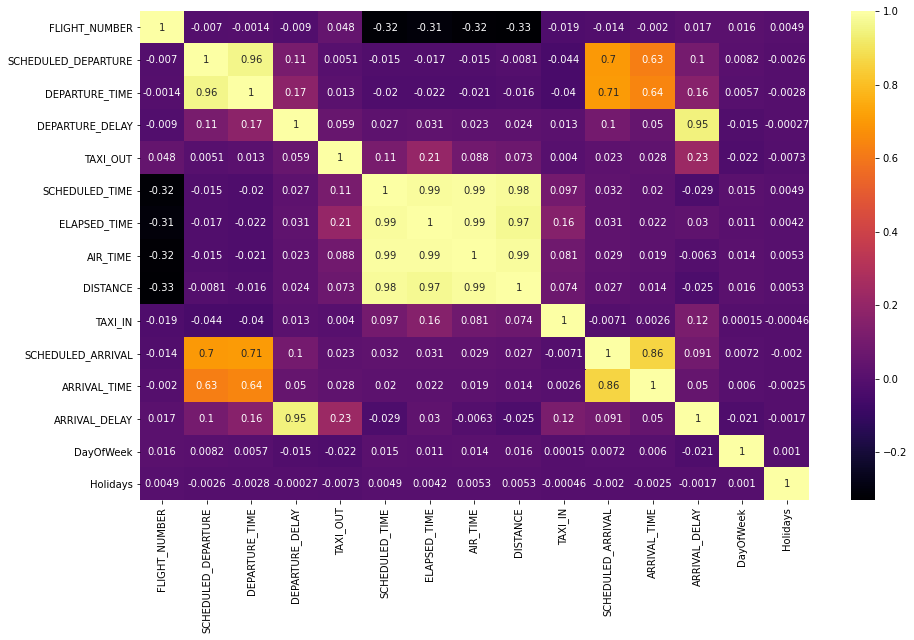

In [45]:
del_corr = Flights_Delays_Combined.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(del_corr,annot=True,cmap='inferno')

Correlation matrix shows, that Holidays have no significat numeric correlation between other variables.

Strongest correlation between ARRIVAL DELAY have:
- SCHEDULED_DEPARTURE
- DEPARTURE_TIME
- DEPARTURE_DELAY
- TAXI_OUT
- WHEELS_OFF
- TAXI_IN

Because DEPARTURE_TIME','SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'ARRIVAL_TIME' have been replaced by datetime represetive (DEP_TIME, 'SCH_ARR_TIME', 'SCH_DEP_TIME', 'ARR_TIME') it need to be dropped.

In [46]:
Flights_Delays_Combined = Flights_Delays_Combined.drop(['DEPARTURE_TIME','SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'ARRIVAL_TIME'], axis=1)

# Transforming delays to binary values

I convert delay values to a binary value. The threshold I choose for the delay, according to FAA regulations, is 15 minutes

In [47]:
DELAY_TRESHOLD = 15

In [48]:
Flights_Delays_Combined.head()

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,...,ARRIVAL_DELAY,ORIGIN_AIRPORT_transformed,DESTINATION_AIRPORT_transformed,DEP_TIME,SCH_ARR_TIME,SCH_DEP_TIME,ARR_TIME,DATE,DayOfWeek,Holidays
0,AS,98,N407AS,-11.0,21.0,00:15:00,205.0,194.0,169.0,1448,...,-22.0,ANC,SEA,23:54:00,04:30:00,00:05:00,04:08:00,2015-01-01,3,0
1,AA,2336,N3KUAA,-8.0,12.0,00:14:00,280.0,279.0,263.0,2330,...,-9.0,LAX,PBI,00:02:00,07:50:00,00:10:00,07:41:00,2015-01-01,3,0
2,US,840,N171US,-2.0,16.0,00:34:00,286.0,293.0,266.0,2296,...,5.0,SFO,CLT,00:18:00,08:06:00,00:20:00,08:11:00,2015-01-01,3,0
3,AA,258,N3HYAA,-5.0,15.0,00:30:00,285.0,281.0,258.0,2342,...,-9.0,LAX,MIA,00:15:00,08:05:00,00:20:00,07:56:00,2015-01-01,3,0
4,AS,135,N527AS,-1.0,11.0,00:35:00,235.0,215.0,199.0,1448,...,-21.0,SEA,ANC,00:24:00,03:20:00,00:25:00,02:59:00,2015-01-01,3,0


In [49]:
def delation_transformation(delay):
    return 1 if delay >= DELAY_TRESHOLD else 0

In [50]:
Flights_Delays_Combined['Delayed'] = Flights_Delays_Combined['ARRIVAL_DELAY'].apply(delation_transformation)

In [51]:
Flights_Delays_Binary = Flights_Delays_Combined.drop(['ARRIVAL_DELAY'], axis=1)
#Flights_Delays_Binary = Flights_Delays_Binary.drop(['DEPARTURE_DELAY'], axis=1)

In [52]:
Flights_Delays_Binary

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,...,ORIGIN_AIRPORT_transformed,DESTINATION_AIRPORT_transformed,DEP_TIME,SCH_ARR_TIME,SCH_DEP_TIME,ARR_TIME,DATE,DayOfWeek,Holidays,Delayed
0,AS,98,N407AS,-11.0,21.0,00:15:00,205.0,194.0,169.0,1448,...,ANC,SEA,23:54:00,04:30:00,00:05:00,04:08:00,2015-01-01,3,0,0
1,AA,2336,N3KUAA,-8.0,12.0,00:14:00,280.0,279.0,263.0,2330,...,LAX,PBI,00:02:00,07:50:00,00:10:00,07:41:00,2015-01-01,3,0,0
2,US,840,N171US,-2.0,16.0,00:34:00,286.0,293.0,266.0,2296,...,SFO,CLT,00:18:00,08:06:00,00:20:00,08:11:00,2015-01-01,3,0,0
3,AA,258,N3HYAA,-5.0,15.0,00:30:00,285.0,281.0,258.0,2342,...,LAX,MIA,00:15:00,08:05:00,00:20:00,07:56:00,2015-01-01,3,0,0
4,AS,135,N527AS,-1.0,11.0,00:35:00,235.0,215.0,199.0,1448,...,SEA,ANC,00:24:00,03:20:00,00:25:00,02:59:00,2015-01-01,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,B6,688,N657JB,-4.0,22.0,00:17:00,320.0,298.0,272.0,2611,...,LAX,BOS,23:55:00,08:19:00,23:59:00,07:53:00,2015-12-31,3,0,0
5819075,B6,745,N828JB,-4.0,17.0,00:12:00,227.0,215.0,195.0,1617,...,JFK,PSE,23:55:00,04:46:00,23:59:00,04:30:00,2015-12-31,3,0,0
5819076,B6,1503,N913JB,-9.0,17.0,00:07:00,221.0,222.0,197.0,1598,...,JFK,SJU,23:50:00,04:40:00,23:59:00,04:32:00,2015-12-31,3,0,0
5819077,B6,333,N527JB,-6.0,10.0,00:03:00,161.0,157.0,144.0,1189,...,MCO,SJU,23:53:00,03:40:00,23:59:00,03:30:00,2015-12-31,3,0,0


In [53]:
Flights_Delays_Binary.isnull().sum()

AIRLINE                            0
FLIGHT_NUMBER                      0
TAIL_NUMBER                        0
DEPARTURE_DELAY                    0
TAXI_OUT                           0
WHEELS_OFF                         0
SCHEDULED_TIME                     0
ELAPSED_TIME                       0
AIR_TIME                           0
DISTANCE                           0
WHEELS_ON                          0
TAXI_IN                            0
ORIGIN_AIRPORT_transformed         0
DESTINATION_AIRPORT_transformed    0
DEP_TIME                           0
SCH_ARR_TIME                       0
SCH_DEP_TIME                       0
ARR_TIME                           0
DATE                               0
DayOfWeek                          0
Holidays                           0
Delayed                            0
dtype: int64

## Data reduction
Because this dataset is large model will be trained only on sample. The sample is chosed by df.sample with 1% of random data.

In [54]:
random.seed(0)
Flights_Delays_Binary_small = Flights_Delays_Binary.sample(frac=0.01)
Flights_Delays_Binary_small.shape

(52311, 22)

***

# Making model of flight delation

## Model 1

### Preparing data for modeling

In [55]:
Flights_Delays_Binary_small.columns

Index(['AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'ORIGIN_AIRPORT_transformed',
       'DESTINATION_AIRPORT_transformed', 'DEP_TIME', 'SCH_ARR_TIME',
       'SCH_DEP_TIME', 'ARR_TIME', 'DATE', 'DayOfWeek', 'Holidays', 'Delayed'],
      dtype='object')

In [56]:
model_1_cols = ['TAXI_OUT', 'TAXI_IN', 'DayOfWeek', 'WHEELS_OFF','AIRLINE', 'ORIGIN_AIRPORT_transformed', 'DESTINATION_AIRPORT_transformed','DEP_TIME','SCH_DEP_TIME','DEPARTURE_DELAY','Delayed']
Flights_Delays_Binary_model_1 = Flights_Delays_Binary_small[model_1_cols]

In [57]:
Flights_Delays_Binary_model_1

,TAXI_OUT,TAXI_IN,DayOfWeek,WHEELS_OFF,AIRLINE,ORIGIN_AIRPORT_transformed,DESTINATION_AIRPORT_transformed,DEP_TIME,SCH_DEP_TIME,DEPARTURE_DELAY,Delayed
2530153,10.0,18.0,1,16:35:00,MQ,GCK,DFW,16:25:00,16:10:00,15.0,1
1627160,8.0,2.0,1,19:23:00,WN,SNA,SMF,19:15:00,19:20:00,-5.0,0
5496061,10.0,10.0,4,06:20:00,EV,PNS,IAH,06:10:00,06:20:00,-10.0,0
1680495,10.0,7.0,5,06:24:00,WN,CAK,MCO,06:14:00,06:15:00,-1.0,0
5037430,23.0,4.0,2,12:25:00,AS,SEA,STL,12:02:00,12:05:00,-3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5002671,8.0,4.0,0,10:16:00,WN,STL,DAL,10:08:00,09:45:00,23.0,0
719183,6.0,5.0,1,12:49:00,WN,CAK,MCO,12:43:00,12:45:00,-2.0,0
5704990,19.0,10.0,3,11:39:00,OO,ASE,ORD,11:20:00,11:17:00,3.0,0
4186502,11.0,5.0,4,09:58:00,WN,MDW,BDL,09:47:00,09:00:00,47.0,1


In [58]:
Flights_Delays_Binary_model_1.head()

,TAXI_OUT,TAXI_IN,DayOfWeek,WHEELS_OFF,AIRLINE,ORIGIN_AIRPORT_transformed,DESTINATION_AIRPORT_transformed,DEP_TIME,SCH_DEP_TIME,DEPARTURE_DELAY,Delayed
2530153,10.0,18.0,1,16:35:00,MQ,GCK,DFW,16:25:00,16:10:00,15.0,1
1627160,8.0,2.0,1,19:23:00,WN,SNA,SMF,19:15:00,19:20:00,-5.0,0
5496061,10.0,10.0,4,06:20:00,EV,PNS,IAH,06:10:00,06:20:00,-10.0,0
1680495,10.0,7.0,5,06:24:00,WN,CAK,MCO,06:14:00,06:15:00,-1.0,0
5037430,23.0,4.0,2,12:25:00,AS,SEA,STL,12:02:00,12:05:00,-3.0,0


In [59]:
Flights_Delays_Binary_model_1._get_numeric_data()

,TAXI_OUT,TAXI_IN,DayOfWeek,DEPARTURE_DELAY,Delayed
2530153,10.0,18.0,1,15.0,1
1627160,8.0,2.0,1,-5.0,0
5496061,10.0,10.0,4,-10.0,0
1680495,10.0,7.0,5,-1.0,0
5037430,23.0,4.0,2,-3.0,0
...,...,...,...,...,...
5002671,8.0,4.0,0,23.0,0
719183,6.0,5.0,1,-2.0,0
5704990,19.0,10.0,3,3.0,0
4186502,11.0,5.0,4,47.0,1


#### Separating numeric and categorical columns

In [60]:
numeric_columns_model_1 = ['TAXI_OUT','TAXI_IN','DayOfWeek','DEPARTURE_DELAY']
cat_columns_model_1 = ['AIRLINE','ORIGIN_AIRPORT_transformed','DESTINATION_AIRPORT_transformed','DEP_TIME','SCH_DEP_TIME','WHEELS_OFF']

***

#### Spliting to train and test

To split data to train and test tables I use *train_test_split*. I set test_size for 20% of data.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(Flights_Delays_Binary_model_1.drop('Delayed', axis=1),
                                                   Flights_Delays_Binary_model_1['Delayed'],
                                                   test_size=0.2,
                                                   stratify=Flights_Delays_Binary_model_1['Delayed'])

In [62]:
X_train

,TAXI_OUT,TAXI_IN,DayOfWeek,WHEELS_OFF,AIRLINE,ORIGIN_AIRPORT_transformed,DESTINATION_AIRPORT_transformed,DEP_TIME,SCH_DEP_TIME,DEPARTURE_DELAY
1935189,9.0,4.0,0,05:51:00,WN,SMF,SAN,05:42:00,05:40:00,2.0
2351749,15.0,16.0,4,17:48:00,OO,ORD,ATL,17:33:00,17:35:00,-2.0
2292856,11.0,13.0,1,09:39:00,MQ,LSE,ORD,09:28:00,09:35:00,-7.0
3385855,35.0,5.0,3,17:18:00,WN,LAX,SLC,16:43:00,15:15:00,88.0
1446914,11.0,4.0,4,14:47:00,WN,MCO,AUS,14:36:00,14:40:00,-4.0
...,...,...,...,...,...,...,...,...,...,...
441448,14.0,4.0,3,22:02:00,AA,DFW,HOU,21:48:00,21:50:00,-2.0
712255,83.0,22.0,1,07:32:00,DL,LGA,ATL,06:09:00,06:00:00,9.0
4271095,12.0,6.0,2,17:12:00,F9,ATL,IND,17:00:00,17:05:00,-5.0
5434411,23.0,4.0,0,08:46:00,EV,ATL,LEX,08:23:00,08:20:00,3.0


StratifiedKFold because it's not balanced

In [64]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

In [65]:
from sklearn.pipeline import FeatureUnion

#### Transformer pipeline

Data contains numeric and cathegorical variables. To interpret them properly I set two pipelines.
* For numeric transformation there is used MinMaxScaler
* For cathegorical varablies there is used OneHotEncoder

In [66]:
# numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('scale_data', MinMaxScaler())
])
# categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
# transformer = numerical + categorical
transformer = ColumnTransformer([
    ('num', numeric_transformer, numeric_columns_model_1),
    ('cat', categorical_transformer, cat_columns_model_1)
])

## Finding best algorithm

### LogisticRegression

In [67]:
param_grid = {
            'classifier__C': [1, 10,25,30,35,45,50,100],
}

pipeline = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression(max_iter=10000, solver='saga'))])

grid_1 = GridSearchCV(pipeline, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [68]:
grid_1.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   12.6s
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   58.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale_data',
                                                                                          MinMaxScaler())]),
                                                                         ['TAXI_OUT',
                                                                          'TAXI_IN',
                                                                          'DayOfWeek',
                                                                          'DEPARTURE_DELAY']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                      

In [69]:
grid_1.best_params_

{'classifier__C': 10}

In [70]:
 print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_1.decision_function(X_test)) ))      

roc_auc_score: 0.9576014871412399


### LinearSVC

In [71]:
pipe = Pipeline([('preprocessing', transformer), ('classifier', LinearSVC(C=1, max_iter=10000))])

param_grid = {
            'classifier__C': [0.1, 1, 10, 100,1000]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)


In [72]:
grid_2.fit(X_train, y_train)
grid_2.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    9.8s
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  1.4min finished


{'classifier__C': 1}

In [73]:
 print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_2.decision_function(X_test)) ))      

roc_auc_score: 0.958835084543245


### RandomForestClassifier

In [74]:
pipe = Pipeline([('preprocessing', transformer), ('classifier', RandomForestClassifier())])

param_grid = {
            'classifier__n_estimators': [20,45],
            'classifier__max_features': [45,100],
            'classifier__max_depth': [50,100]
}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [75]:
grid_3.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    8.6s
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   44.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale_data',
                                                                                          MinMaxScaler())]),
                                                                         ['TAXI_OUT',
                                                                          'TAXI_IN',
                                                                          'DayOfWeek',
                                                                          'DEPARTURE_DELAY']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                     

In [76]:
grid_3.best_params_

{'classifier__max_depth': 100,
 'classifier__max_features': 100,
 'classifier__n_estimators': 45}

In [77]:
grid_3.fit(X_train, y_train)
grid_3.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    8.2s
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   44.0s finished


{'classifier__max_depth': 100,
 'classifier__max_features': 100,
 'classifier__n_estimators': 45}

### DecisionTreeClassifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

pipe_4 = Pipeline([('preprocessing', transformer), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_4 = {
            'classifier__max_depth': [10,20,25,30],
            'classifier__min_samples_split': [60,80,100],
            'classifier__max_leaf_nodes': [60,85,100]
}


grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [79]:
grid_4.fit(X_train, y_train)
grid_4.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    3.8s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   17.8s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   41.1s
[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed:   47.2s finished


{'classifier__max_depth': 25,
 'classifier__max_leaf_nodes': 85,
 'classifier__min_samples_split': 100}

In [81]:
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_4.predict_proba(X_test)[:,1]) ))

roc_auc_score: 0.9649638255736873


### BaggingClassifier

In [82]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

pipe_5 = Pipeline([('preprocessing', transformer), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [20,40,60,100]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)




In [83]:
grid_5.fit(X_train, y_train)
grid_5.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    8.4s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:   43.8s finished


{'classifier__max_samples': 100, 'classifier__n_estimators': 10}

In [84]:
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_5.predict_proba(X_test)[:,1]) ))

roc_auc_score: 0.9425888188352267


## Compering algorithms

In [85]:


models = []
models.append(('LR', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('RandomForestClassifier', grid_3.best_estimator_))
models.append(('DecisionTreeClassifier', grid_4.best_estimator_))
models.append(('BaggingClassifier', grid_5.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))            
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))        
    else:    
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

LR
precision_score: 0.9166666666666666
recall_score: 0.7395885599598595
f1_score: 0.8186614829214107
accuracy_score: 0.9375896014527382
roc_auc_score: 0.9576014871412397
SVM linear
precision_score: 0.9159049360146252
recall_score: 0.7541394882087306
f1_score: 0.8271876719867913
accuracy_score: 0.9399789735257574
roc_auc_score: 0.958835084543245
RandomForestClassifier
precision_score: 0.9115764979639325
recall_score: 0.7862518815855494
f1_score: 0.8442887931034482
accuracy_score: 0.9447577176717958
roc_auc_score: 0.959187735586951
DecisionTreeClassifier
precision_score: 0.8947963800904978
recall_score: 0.7937782237832414
f1_score: 0.8412656208455198
accuracy_score: 0.9429417948963013
roc_auc_score: 0.9649638255736873
BaggingClassifier
precision_score: 0.9336043360433605
recall_score: 0.6914199698946312
f1_score: 0.7944652637647737
accuracy_score: 0.9318551084774921
roc_auc_score: 0.9425888188352267


## Model 2

This model will contain only variables that are avaiable before plane take-off.

In [86]:
Flights_Delays_Binary_small.columns

Index(['AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'ORIGIN_AIRPORT_transformed',
       'DESTINATION_AIRPORT_transformed', 'DEP_TIME', 'SCH_ARR_TIME',
       'SCH_DEP_TIME', 'ARR_TIME', 'DATE', 'DayOfWeek', 'Holidays', 'Delayed'],
      dtype='object')

Variables that are avaiable before start:

'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', ,'ORIGIN_AIRPORT_transformed','DESTINATION_AIRPORT_transformed', 'DEPARTURE_DELAY','TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME','DISTANCE', 'DEP_TIME', 'SCH_ARR_TIME', 'SCH_DEP_TIME', 'DATE', 'DayOfWeek', 'Holidays', 'Delayed'


In [87]:
model_2_cols = ['AIRLINE', 'FLIGHT_NUMBER','ORIGIN_AIRPORT_transformed','DESTINATION_AIRPORT_transformed', 'TAIL_NUMBER', 'DEPARTURE_DELAY','TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME','DISTANCE', 'DEP_TIME', 'SCH_ARR_TIME', 'SCH_DEP_TIME', 'DayOfWeek', 'Holidays', 'Delayed']
Flights_Delays_Binary_model_2 = Flights_Delays_Binary_small[model_2_cols]

In [88]:
Flights_Delays_Binary_model_2._get_numeric_data()

,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,DayOfWeek,Holidays,Delayed
2530153,3228,15.0,10.0,85.0,404,1,0,1
1627160,130,-5.0,8.0,85.0,404,1,0,0
5496061,4376,-10.0,10.0,110.0,489,4,0,0
1680495,2037,-1.0,10.0,140.0,861,5,0,0
5037430,748,-3.0,23.0,224.0,1709,2,0,0
...,...,...,...,...,...,...,...,...
5002671,2870,23.0,8.0,105.0,546,0,0,0
719183,469,-2.0,6.0,150.0,861,1,0,0
5704990,6520,3.0,19.0,168.0,1013,3,0,0
4186502,3181,47.0,11.0,120.0,777,4,0,1


In [89]:
numeric_columns_model_2 = ['FLIGHT_NUMBER','DEPARTURE_DELAY','TAXI_OUT','DISTANCE','DayOfWeek','Holidays']
cat_columns_model_2 = ['AIRLINE','TAIL_NUMBER','ORIGIN_AIRPORT_transformed','DESTINATION_AIRPORT_transformed','WHEELS_OFF','SCHEDULED_TIME','SCH_ARR_TIME','SCH_DEP_TIME']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(Flights_Delays_Binary_model_2.drop('Delayed', axis=1),
                                                   Flights_Delays_Binary_model_2['Delayed'],
                                                   test_size=0.2,
                                                   stratify=Flights_Delays_Binary_model_2['Delayed'])

In [91]:
# numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('scale_data', MinMaxScaler())
])
# categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
# transformer = numerical + categorical
transformer = ColumnTransformer([
    ('num', numeric_transformer, numeric_columns_model_2),
    ('cat', categorical_transformer, cat_columns_model_2)
])

In [92]:
param_grid = {
            'classifier__C': [1, 10, 100,1000],
}

pipeline = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression(max_iter=10000, solver='saga'))])

grid_1 = GridSearchCV(pipeline, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [93]:
grid_1.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   24.2s
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  1.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale_data',
                                                                                          MinMaxScaler())]),
                                                                         ['FLIGHT_NUMBER',
                                                                          'DEPARTURE_DELAY',
                                                                          'TAXI_OUT',
                                                                          'DISTANCE',
                                                                          'DayOfWeek',
                                                                          'Holidays']),
                                         

In [108]:
from sklearn import  metrics
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_1.decision_function(X_test)) ))      

roc_auc_score: 0.9271084130922839


In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', transformer), ('classifier', LinearSVC(C=1, max_iter=10000))])

param_grid = {
            'classifier__C': [0.1, 1, 10, 100,1000]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)


In [95]:
grid_2.fit(X_train, y_train)
grid_2.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   16.7s
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  1.3min finished


{'classifier__C': 1}

In [96]:
 print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_2.decision_function(X_test)) ))      

roc_auc_score: 0.9188532354385568


In [97]:
from sklearn.ensemble import RandomForestClassifier 

pipe = Pipeline([('preprocessing', transformer), ('classifier', RandomForestClassifier())])

param_grid = {
            'classifier__n_estimators': [20,45],
            'classifier__max_features': [45,100],
            'classifier__max_depth': [50,100]
}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [98]:
grid_3.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    8.8s
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   43.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale_data',
                                                                                          MinMaxScaler())]),
                                                                         ['FLIGHT_NUMBER',
                                                                          'DEPARTURE_DELAY',
                                                                          'TAXI_OUT',
                                                                          'DISTANCE',
                                                                          'DayOfWeek',
                                                                          'Holidays']),
                                        

In [99]:
grid_3.best_params_

{'classifier__max_depth': 100,
 'classifier__max_features': 100,
 'classifier__n_estimators': 45}

In [100]:
grid_3.fit(X_train, y_train)
grid_3.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    8.9s
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   41.9s finished


{'classifier__max_depth': 100,
 'classifier__max_features': 100,
 'classifier__n_estimators': 45}

In [101]:
from sklearn.tree import DecisionTreeClassifier

pipe_4 = Pipeline([('preprocessing', transformer), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_4 = {
            'classifier__max_depth': [10,20,25,30],
            'classifier__min_samples_split': [60,80,100],
            'classifier__max_leaf_nodes': [60,85,100]
}


grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [102]:
grid_4.fit(X_train, y_train)
grid_4.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   26.7s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed:  1.1min finished


{'classifier__max_depth': 25,
 'classifier__max_leaf_nodes': 60,
 'classifier__min_samples_split': 100}

In [103]:
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_4.predict_proba(X_test)[:,1]) ))

roc_auc_score: 0.9540904085195469


In [104]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

pipe_5 = Pipeline([('preprocessing', transformer), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [20,40,60,100]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)




In [105]:
grid_5.fit(X_train, y_train)
grid_5.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   11.0s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:   54.0s finished


{'classifier__max_samples': 100, 'classifier__n_estimators': 10}

In [106]:


models = []
models.append(('LR', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('RandomForestClassifier', grid_3.best_estimator_))
models.append(('DecisionTreeClassifier', grid_4.best_estimator_))
models.append(('BaggingClassifier', grid_5.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))            
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))        
    else:    
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

LR
precision_score: 0.8197562540089801
recall_score: 0.6412443552433518
f1_score: 0.7195945945945946
accuracy_score: 0.9048074166109147
roc_auc_score: 0.9114511178735965
SVM linear
precision_score: 0.8308823529411765
recall_score: 0.6803813346713498
f1_score: 0.7481379310344829
accuracy_score: 0.9127401318933385
roc_auc_score: 0.9188532354385568
RandomForestClassifier
precision_score: 0.9186268277177368
recall_score: 0.7250376317109885
f1_score: 0.8104318564217612
accuracy_score: 0.9353913791455606
roc_auc_score: 0.9444932114822185
DecisionTreeClassifier
precision_score: 0.8870412844036697
recall_score: 0.7762167586552935
f1_score: 0.8279368477388279
accuracy_score: 0.9385453502819459
roc_auc_score: 0.9540904085195469
BaggingClassifier
precision_score: 0.8930288461538461
recall_score: 0.745609633718013
f1_score: 0.8126879956248291
accuracy_score: 0.9345312051992737
roc_auc_score: 0.9430952844992893


In [141]:
importances = grid_3.best_estimator_._final_estimator.feature_importances_

In [145]:
grid_3.best_estimator_.named_steps["classifier"].feature_importances_

array([1.00701539e-02, 5.41179903e-01, 7.14733335e-02, ...,
       9.54338112e-06, 0.00000000e+00, 4.83252961e-05])